# TP3 - Classification d'images par SVM et MLP


In [2]:
# LIBRARY IMPORT
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn import preprocessing
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

enc = preprocessing.LabelEncoder()
sns.set_palette("flare")


## a. Chargement des données

In [3]:
df = pd.read_csv("datasets/database.csv", header=0, index_col=0)
data = df.drop(["Classe", "SousClasse"], axis=1)
targets_raw = df.Classe

enc.fit(targets_raw)
targets = enc.transform(targets_raw)

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.33, random_state=42)

print("Targets:")
print(pd.DataFrame(train_targets).value_counts())

print("Training data description:")
display(train_data.describe())

train_data_cr = (train_data - train_data.mean()) / train_data.std()
print("Training data description:")
display(train_data_cr.describe())

Targets:
1    991
0    809
dtype: int64
Training data description:


,GaborFeature0,GaborFeature1,GaborFeature2,GaborFeature3,GaborFeature4,GaborFeature5,GaborFeature6,GaborFeature7,GaborFeature8,GaborFeature9,...,GaborFeature17,GaborFeature18,GaborFeature19,GaborFeature20,GaborFeature21,GaborFeature22,GaborFeature23,Y_Feature,Cr_Feature,Cb_Feature
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.007716,0.008282,0.006268,-0.002780,-0.000699,-0.006049,-0.002296,-0.003697,0.023674,0.025558,...,0.009902,0.007013,0.010784,0.007353,0.003947,0.000591,-0.004947,0.007023,-0.022411,0.013652
std,0.978999,1.053135,1.042779,1.027289,0.972272,0.969279,0.985432,0.962916,1.064383,1.086283,...,1.000635,0.997655,0.994123,1.000515,1.045445,1.024404,0.988252,1.000691,0.979098,0.983454
min,-0.550791,-0.550592,-0.668584,-0.735857,-0.905140,-0.972460,-0.962848,-0.875461,-0.846702,-0.874398,...,-0.903837,-0.887640,-0.897915,-0.856155,-0.829554,-0.911938,-0.883317,-2.941101,-4.540489,-4.089776
25%,-0.494093,-0.492013,-0.581737,-0.617747,-0.675417,-0.695227,-0.666574,-0.634250,-0.560820,-0.574915,...,-0.583578,-0.579697,-0.600129,-0.628690,-0.587011,-0.637855,-0.642121,-0.620467,-0.602438,-0.516377
50%,-0.364339,-0.328436,-0.346017,-0.339905,-0.320796,-0.305992,-0.291388,-0.295502,-0.310276,-0.276868,...,-0.265300,-0.269383,-0.279666,-0.319502,-0.280186,-0.300767,-0.309873,0.084942,-0.026628,0.059841
75%,0.074570,0.088929,0.177063,0.180052,0.318247,0.367812,0.417405,0.300359,0.181462,0.202830,...,0.249110,0.229967,0.228912,0.280093,0.307849,0.335664,0.270266,0.622505,0.525206,0.643933
max,9.872101,20.693795,12.710283,9.285939,5.780731,8.248066,11.058592,9.271685,12.080703,15.054789,...,11.742860,12.098958,9.955945,10.982451,22.858458,11.546471,10.544165,3.758650,4.950377,4.162559


Training data description:


,GaborFeature0,GaborFeature1,GaborFeature2,GaborFeature3,GaborFeature4,GaborFeature5,GaborFeature6,GaborFeature7,GaborFeature8,GaborFeature9,...,GaborFeature17,GaborFeature18,GaborFeature19,GaborFeature20,GaborFeature21,GaborFeature22,GaborFeature23,Y_Feature,Cr_Feature,Cb_Feature
count,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,...,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03,1.800000e+03
mean,4.724616e-17,-3.423188e-18,-5.131698e-17,-7.956598e-18,-8.554885e-17,2.898916e-18,7.123931e-18,-5.048431e-17,-1.258253e-17,-6.886467e-17,...,-2.405483e-17,-3.299830e-17,1.443290e-17,1.865791e-18,7.285839e-18,-1.973730e-18,1.015777e-17,-2.787893e-17,3.577385e-18,-5.193377e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.704882e-01,-5.306767e-01,-6.471663e-01,-7.136039e-01,-9.302341e-01,-9.970412e-01,-9.747520e-01,-9.053368e-01,-8.177290e-01,-8.284735e-01,...,-9.131588e-01,-8.967554e-01,-9.140716e-01,-8.630643e-01,-7.972684e-01,-8.907904e-01,-8.888115e-01,-2.946088e+00,-4.614532e+00,-4.172464e+00
25%,-5.125740e-01,-4.750530e-01,-5.638824e-01,-5.986306e-01,-6.939597e-01,-7.110216e-01,-6.740975e-01,-6.548371e-01,-5.491394e-01,-5.527781e-01,...,-5.931041e-01,-5.880885e-01,-6.145252e-01,-6.357161e-01,-5.652687e-01,-6.232366e-01,-6.447489e-01,-6.270565e-01,-5.924096e-01,-5.389466e-01
50%,-3.800365e-01,-3.197298e-01,-3.378326e-01,-3.281698e-01,-3.292254e-01,-3.094497e-01,-2.933657e-01,-3.030430e-01,-3.137501e-01,-2.784046e-01,...,-2.750272e-01,-2.770455e-01,-2.921677e-01,-3.266868e-01,-2.717811e-01,-2.941795e-01,-3.085514e-01,7.786521e-02,-4.306756e-03,4.696638e-02
75%,6.828765e-02,7.657753e-02,1.637885e-01,1.779749e-01,3.280418e-01,3.857097e-01,4.259058e-01,3.157667e-01,1.482435e-01,1.631912e-01,...,2.390556e-01,2.234782e-01,2.194168e-01,2.725995e-01,2.906921e-01,3.270908e-01,2.784845e-01,6.150570e-01,5.593075e-01,6.408843e-01
max,1.007599e+01,1.964184e+01,1.218284e+01,9.041969e+00,5.946311e+00,8.515726e+00,1.122441e+01,9.632600e+00,1.132771e+01,1.383547e+01,...,1.172551e+01,1.212036e+01,1.000396e+01,1.096945e+01,2.186104e+01,1.127083e+01,1.067451e+01,3.749035e+00,5.078949e+00,4.218707e+00


## b. Analyse haut niveau des données

Text(0, 0.5, 'Class')

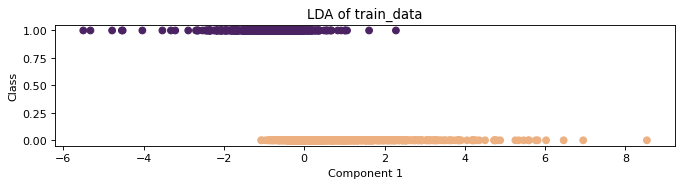

In [4]:
# Fit data and train model
lda = LinearDiscriminantAnalysis()
transformed_train_data = lda.fit_transform(train_data_cr, train_targets)

plt.figure(figsize=(10, 2), dpi=80)
plt.scatter(transformed_train_data, train_targets, c=train_targets, cmap=sns.color_palette("flare", as_cmap=True))
plt.title("LDA of train_data")
plt.xlabel("Component 1")
plt.ylabel("Class")

On voit que ça se chevauche pas mal, mais qu'il y a quand même une différenciation entre les deux

## c. Modèle prédictif par LDA

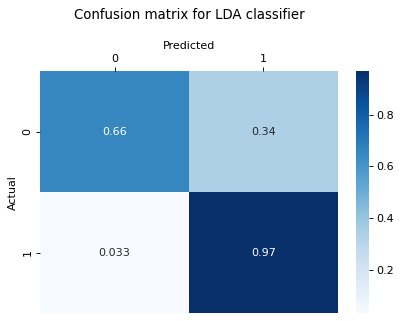

In [5]:
predicted_test_labels = lda.predict(test_data)


plt.figure(figsize=(6, 4), dpi=80)
ax = plt.gca()
cm = confusion_matrix(test_targets, predicted_test_labels, normalize="true")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title(f"Confusion matrix for LDA classifier", pad=20)
plt.ylabel(f"Actual")
plt.xlabel(f"Predicted")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

C'est pas ouf du tout, on a 34% de faux positifs!

## d. Modèle prédictif par SVC

In [13]:
all_scores = {"label": [], "kernel": [], "C": [], "min": [], "max": []}

for c in [0.01, *np.arange(0.25, 50, 0.25)]:
    for kernel_type in ["linear", "poly", "rbf", "sigmoid"]:
        clf = svm.SVC(kernel=kernel_type, C=c)
        clf.fit(train_data_cr, train_targets)
        predicted_test_labels = clf.predict(test_data)

        scores = cross_validate(clf, train_data, train_targets, scoring='balanced_accuracy', cv=5, return_estimator=True)
        
        all_scores["label"].append(f"k={kernel_type}, C={c}")
        all_scores["kernel"].append(kernel_type)
        all_scores["C"].append(c)
        all_scores["min"].append(scores['test_score'].min())
        all_scores["max"].append(scores['test_score'].max())
        print(f"k={kernel_type}, C={c} --> [{scores['test_score'].min()}, {scores['test_score'].max()}]")

plt.tight_layout()

all_scores = pd.DataFrame(all_scores)
display(all_scores)

k=linear, C=0.01 --> [0.8237934904601572, 0.8434343434343434]
k=poly, C=0.01 --> [0.5294612794612794, 0.5401234567901234]
k=rbf, C=0.01 --> [0.5030864197530864, 0.5154320987654321]
k=sigmoid, C=0.01 --> [0.6036705265457724, 0.6714365881032548]
k=linear, C=0.25 --> [0.8583052749719416, 0.8805206154998595]
k=poly, C=0.25 --> [0.65527950310559, 0.6950056116722783]
k=rbf, C=0.25 --> [0.8181818181818181, 0.8487654320987654]
k=sigmoid, C=0.25 --> [0.7424242424242424, 0.7669715034801337]
k=linear, C=0.5 --> [0.8613916947250281, 0.8873248228721247]
k=poly, C=0.5 --> [0.6782046880364556, 0.7533670033670035]
k=rbf, C=0.5 --> [0.8367003367003367, 0.8653198653198653]
k=sigmoid, C=0.5 --> [0.7300785634118967, 0.7427048260381593]
k=linear, C=0.75 --> [0.8625140291806959, 0.889837385686195]
k=poly, C=0.75 --> [0.7191703860919505, 0.7687991021324354]
k=rbf, C=0.75 --> [0.8417508417508417, 0.8745791245791246]
k=sigmoid, C=0.75 --> [0.7199775533108866, 0.7331649831649831]
k=linear, C=1.0 --> [0.86616161

,label,kernel,C,min,max
0,"k=linear, C=0.01",linear,0.01,0.823793,0.843434
1,"k=poly, C=0.01",poly,0.01,0.529461,0.540123
2,"k=rbf, C=0.01",rbf,0.01,0.503086,0.515432
3,"k=sigmoid, C=0.01",sigmoid,0.01,0.603671,0.671437
4,"k=linear, C=0.25",linear,0.25,0.858305,0.880521
...,...,...,...,...,...
795,"k=sigmoid, C=49.5",sigmoid,49.50,0.687149,0.755033
796,"k=linear, C=49.75",linear,49.75,0.870932,0.903199
797,"k=poly, C=49.75",poly,49.75,0.852132,0.897587
798,"k=rbf, C=49.75",rbf,49.75,0.880191,0.920595


<Figure size 432x288 with 0 Axes>

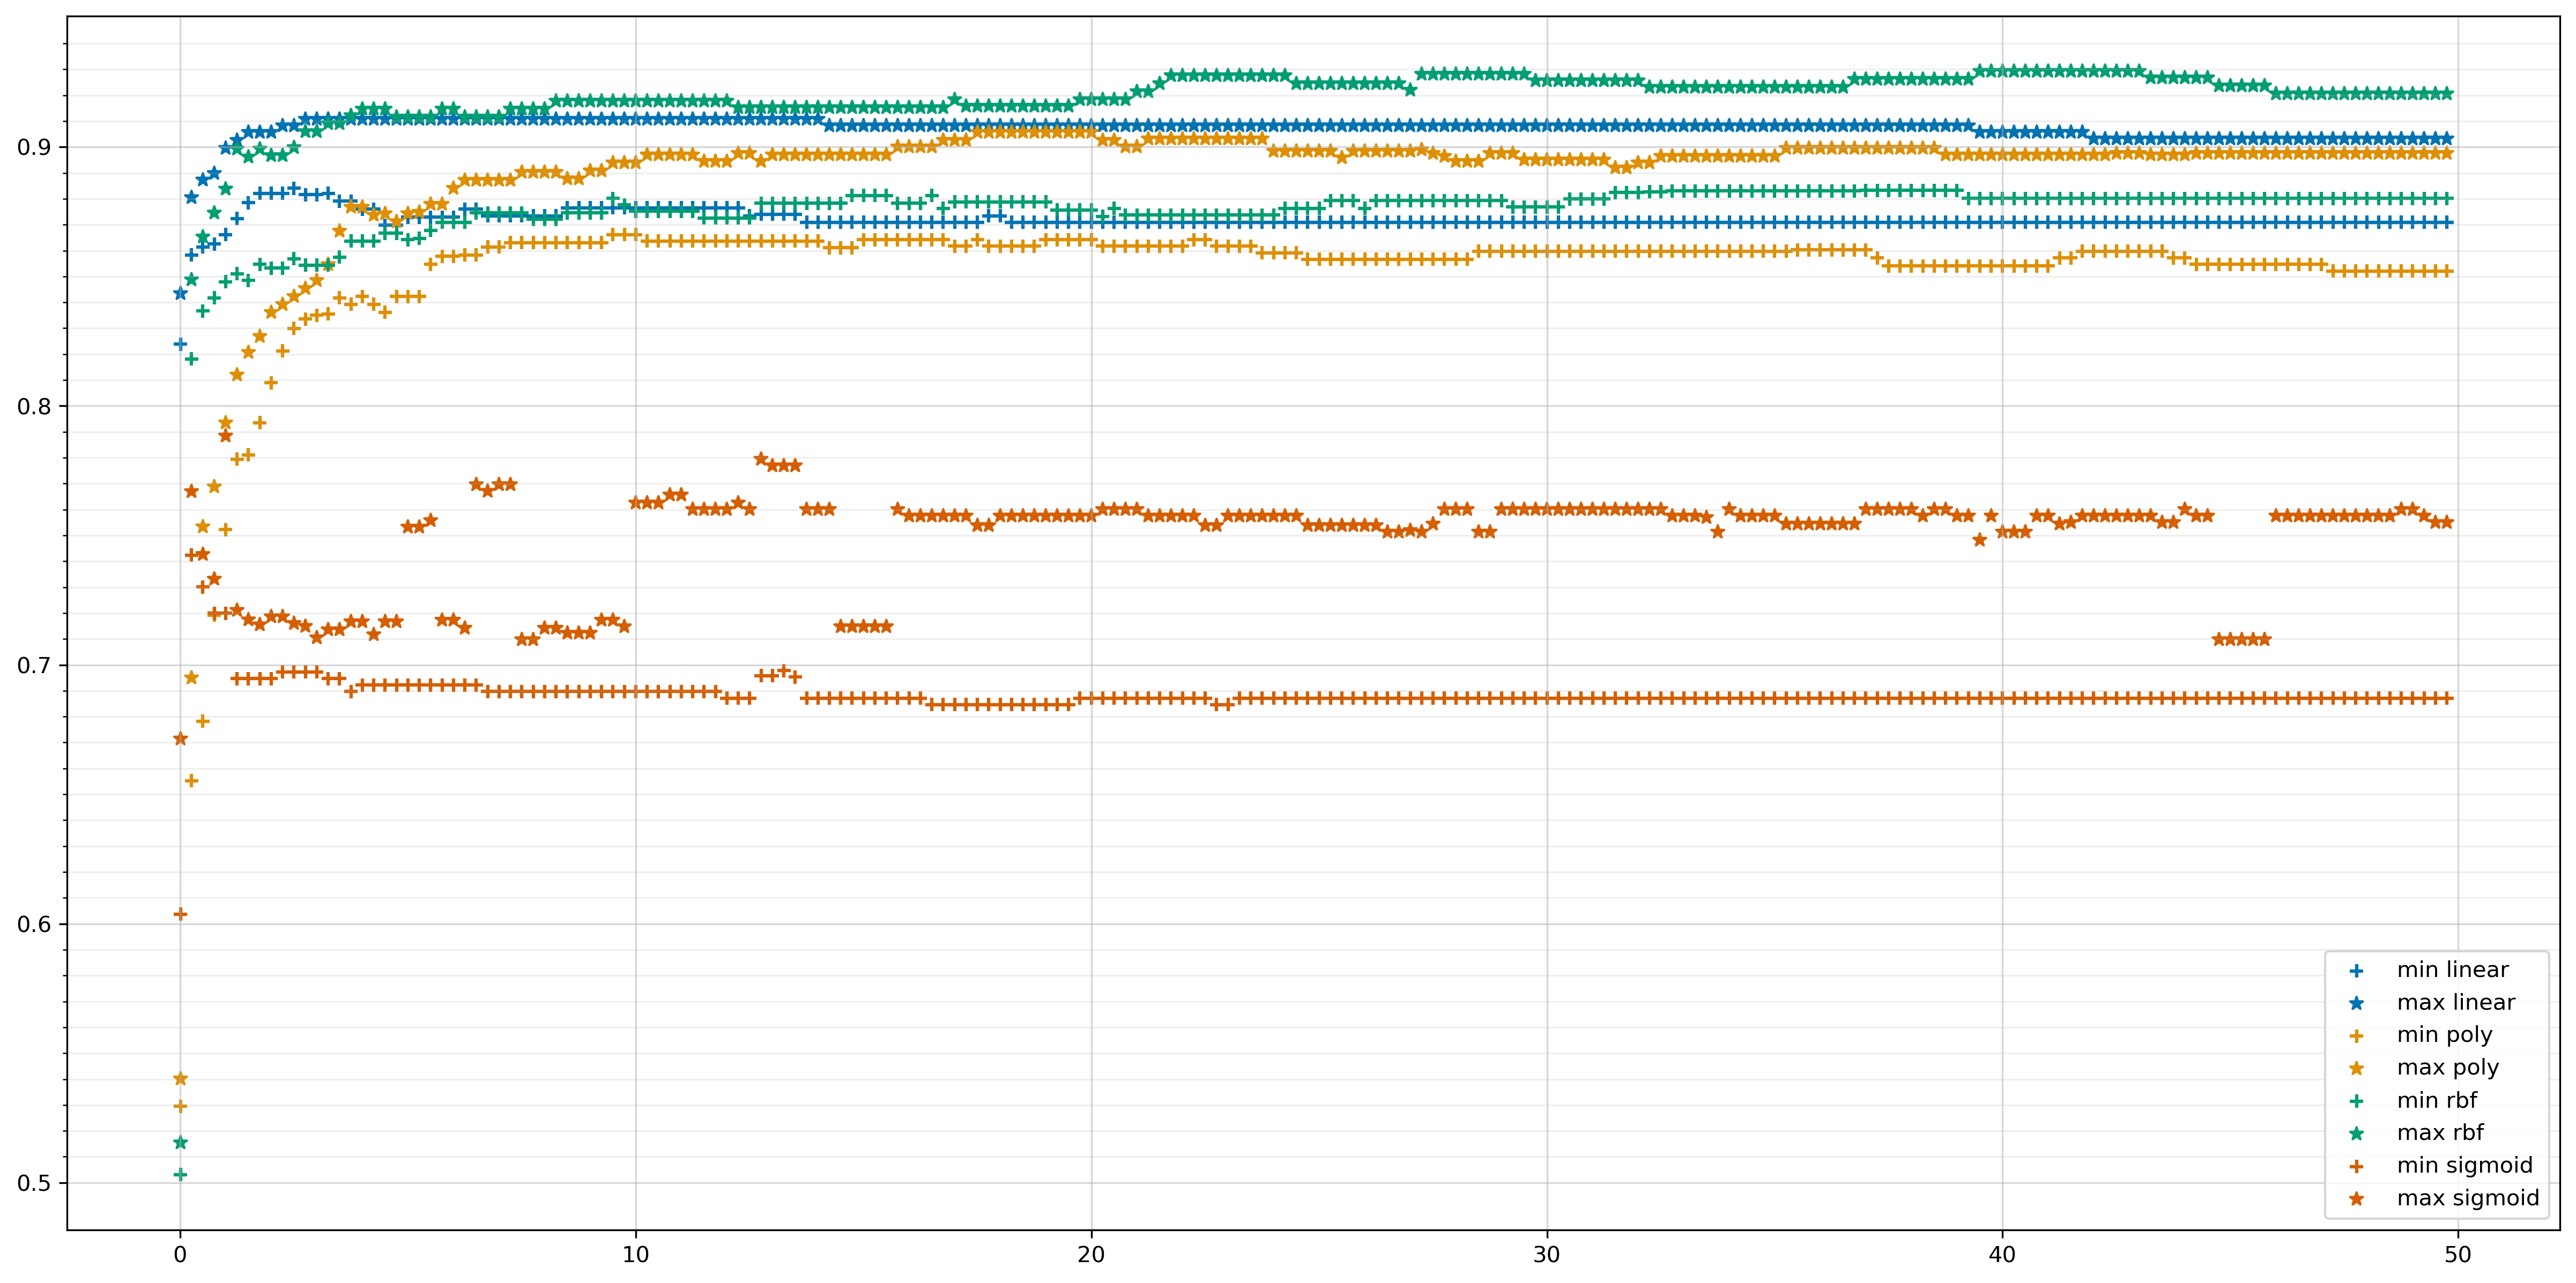

In [44]:
plt.figure(figsize=(20, 10), dpi=300)

kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel_type in ["linear", "poly", "rbf", "sigmoid"]:
    ker_scores = all_scores[all_scores["kernel"] == kernel_type]
    sorted_ker_scores = ker_scores.sort_values(by="C")

    colours = [sns.color_palette("colorblind")[kernels.index(kernel)] for kernel in sorted_ker_scores["kernel"]]
    
    plt.scatter(sorted_ker_scores["C"], sorted_ker_scores["min"], marker="+", c=colours, label=f"min {kernel_type}")
    plt.scatter(sorted_ker_scores["C"], sorted_ker_scores["max"], marker="*", c=colours, label=f"max {kernel_type}")

ax = plt.gca()

major_ticks = np.arange(0.5, 0.95, 0.1)
minor_ticks = np.arange(0.5, 0.95, 0.01)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.grid(visible='true', which='both')
ax.legend()


On voit donc que le meilleur jeu de paramètres est le noyeau linéaire avec c=40

On trace maintenant la matrice de confusion pour voir à quel point ça marche bien:

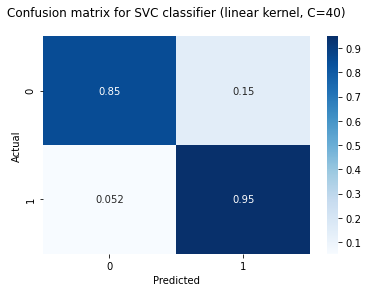

In [54]:
clf = svm.SVC(kernel="rbf", C=40)
clf.fit(train_data_cr, train_targets)
predicted_test_labels = clf.predict(test_data)

cm = confusion_matrix(test_targets, predicted_test_labels, normalize="true")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title(f"Confusion matrix for SVC classifier (linear kernel, C=40)", pad=20)
plt.ylabel(f"Actual")
plt.xlabel(f"Predicted")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

C'est mieux que la LDA mais il nous reste quand même 15% de faux positifs

## e. MLP

In [48]:
all_scores_mlp = {"nb_neurons": [], "min": [], "max": []}

for i, nb_neurons in enumerate(range(10, 150, 1)):
    clf = MLPClassifier(hidden_layer_sizes=(nb_neurons,), random_state=1, max_iter=5000, early_stopping=True).fit(train_data, train_targets)
    predicted_test_labels = clf.predict(test_data)

    scores = cross_validate(clf, train_data, train_targets, scoring='balanced_accuracy', cv=5, return_estimator=True)

    all_scores_mlp["nb_neurons"].append(nb_neurons)
    all_scores_mlp["min"].append(scores['test_score'].min())
    all_scores_mlp["max"].append(scores['test_score'].max())
    print(f"Score for {nb_neurons} neurons: [{scores['test_score'].min()}, {scores['test_score'].max()}]")


Score for 10 neurons: [0.7494388327721662, 0.8694247635693998]
Score for 11 neurons: [0.8021885521885522, 0.8251964085297419]
Score for 12 neurons: [0.7397234620306501, 0.851290684624018]
Score for 13 neurons: [0.7704826038159371, 0.8748597081930415]
Score for 14 neurons: [0.8013468013468014, 0.8364197530864197]
Score for 15 neurons: [0.7974186307519642, 0.8731762065095399]
Score for 16 neurons: [0.7918069584736251, 0.851290684624018]
Score for 17 neurons: [0.781986531986532, 0.8431130809326134]
Score for 18 neurons: [0.8380879553044727, 0.8650392817059483]
Score for 19 neurons: [0.8204264870931537, 0.8586410312431725]
Score for 20 neurons: [0.7954545454545454, 0.8828927244920253]
Score for 21 neurons: [0.8372615039281706, 0.8866442199775533]
Score for 22 neurons: [0.8285634118967452, 0.8765432098765432]
Score for 23 neurons: [0.7991021324354658, 0.8672839506172839]
Score for 24 neurons: [0.824354657687991, 0.8661616161616161]
Score for 25 neurons: [0.8111672278338945, 0.83782267115600

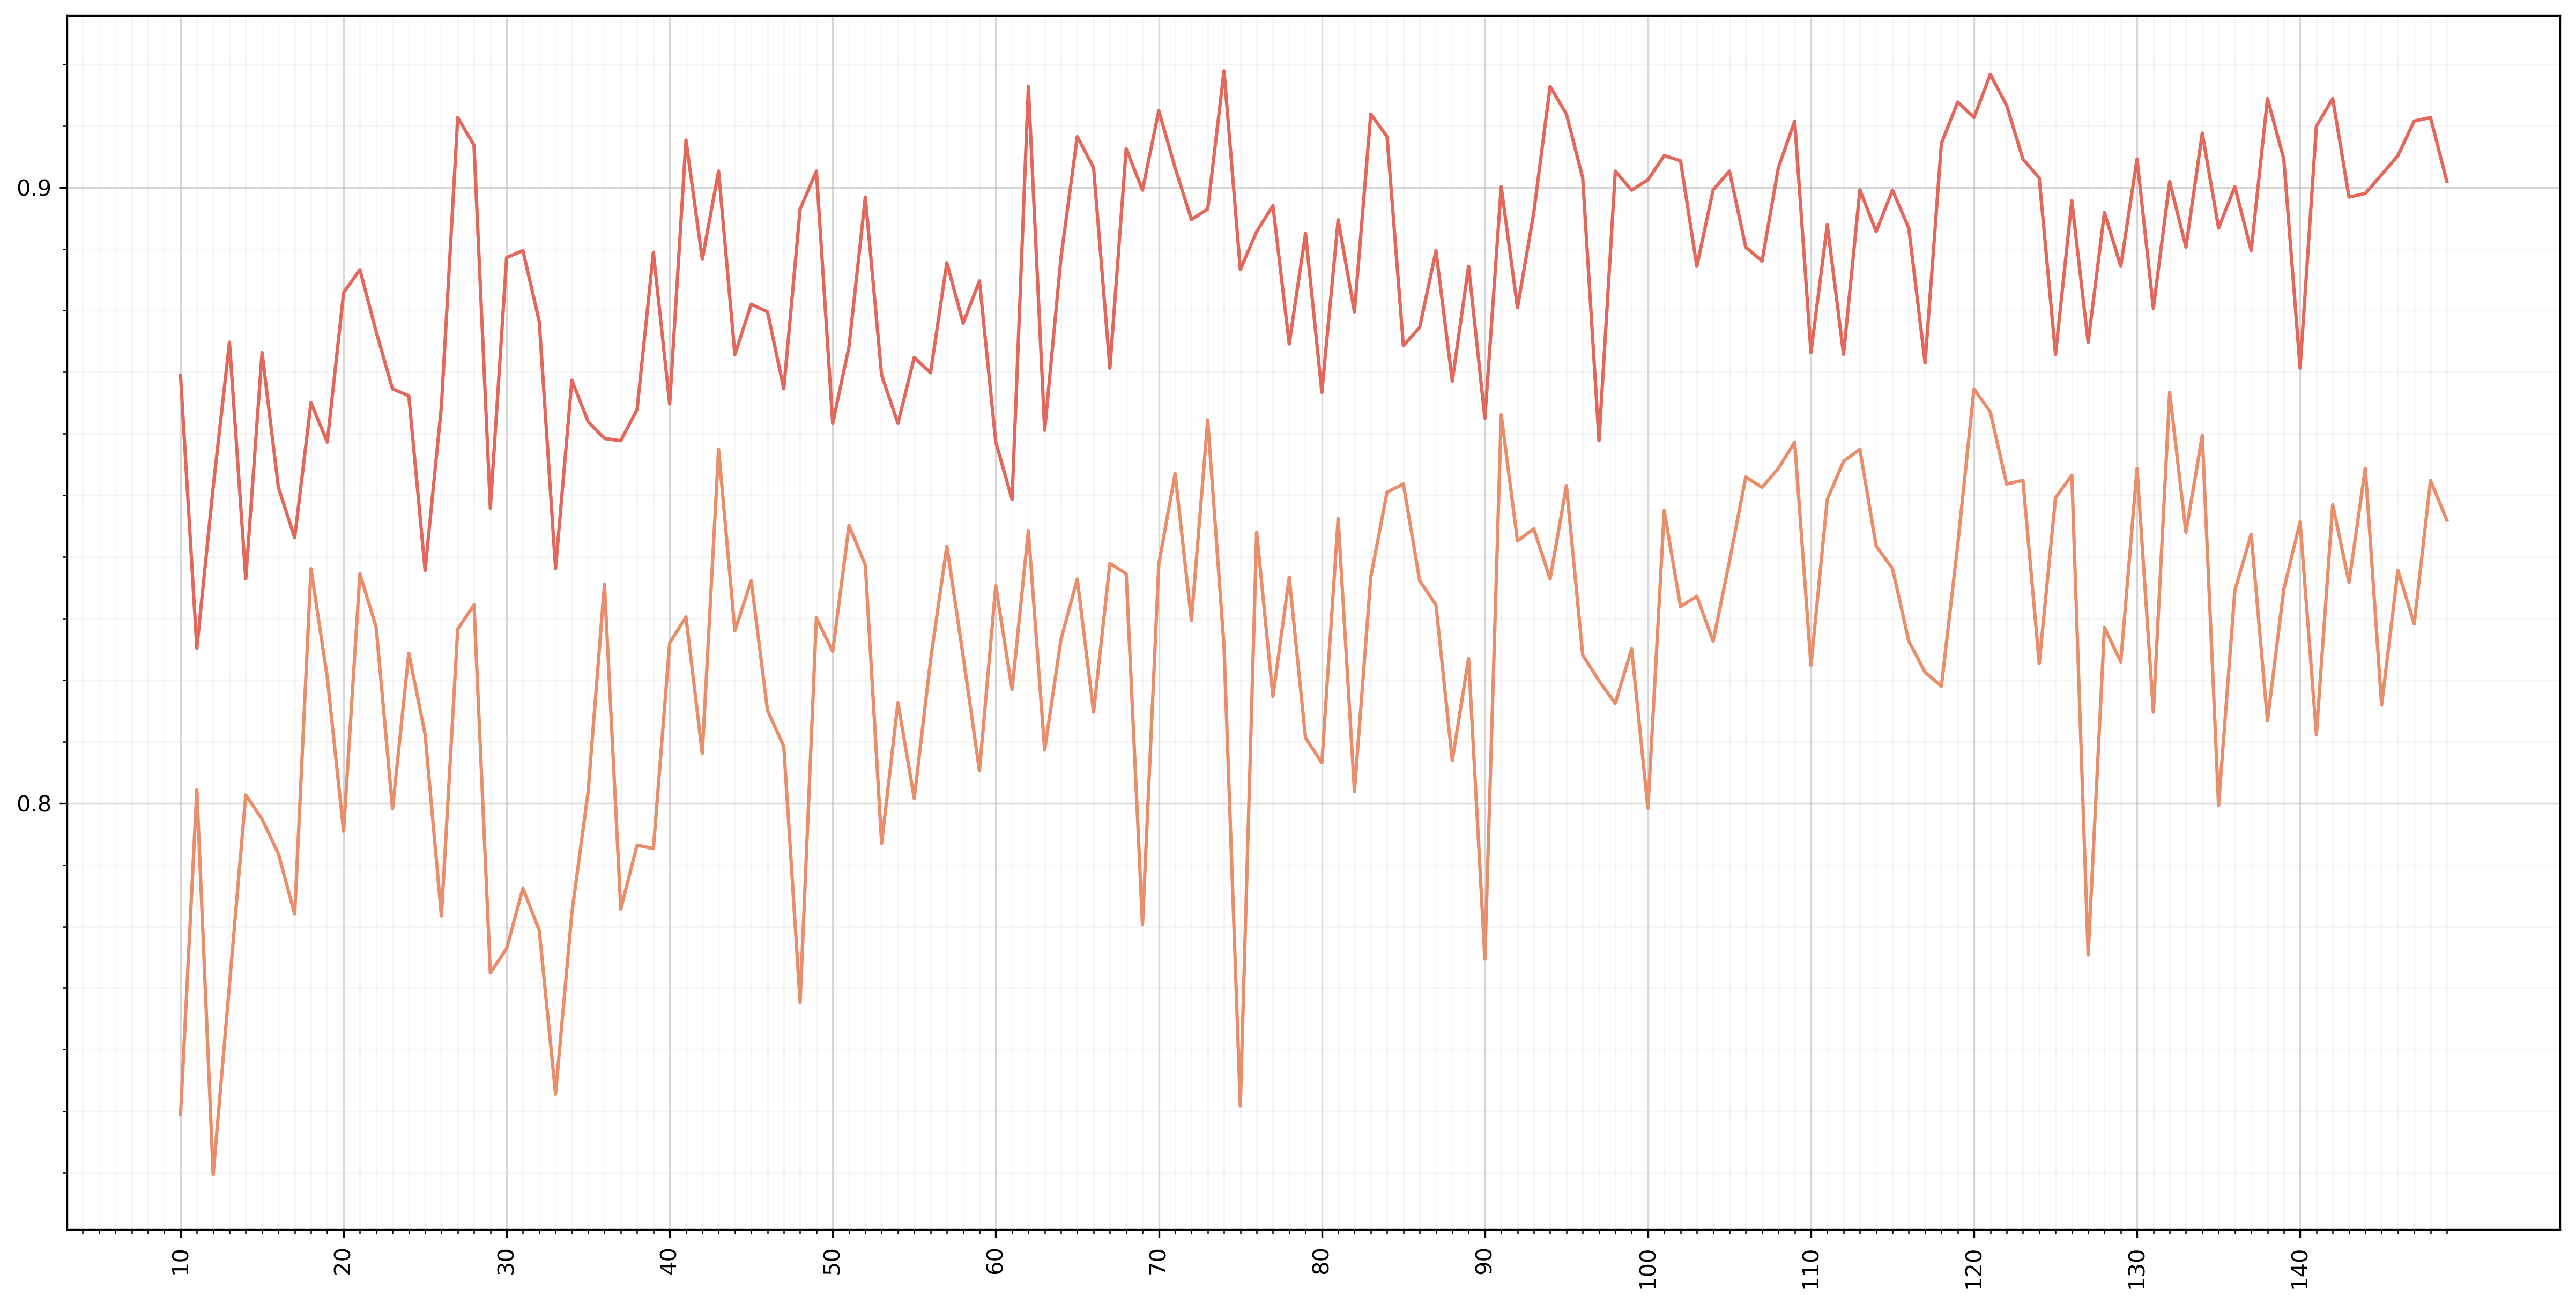

In [52]:
all_scores_mlp = pd.DataFrame(all_scores_mlp)
sorted_scores = all_scores_mlp.sort_values(by=["nb_neurons"])

plt.figure(figsize=(20, 10), dpi=300)

ax = plt.gca()

major_ticks = np.arange(0.5, 0.95, 0.1)
minor_ticks = np.arange(0.5, 0.95, 0.01)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

major_ticks = np.arange(0, 150, 10)
minor_ticks = np.arange(0, 150, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)


ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(visible='true', which='both')

plt.plot(sorted_scores["nb_neurons"], sorted_scores["min"])
plt.plot(sorted_scores["nb_neurons"], sorted_scores["max"])

plt.xticks(rotation=90)
plt.show()

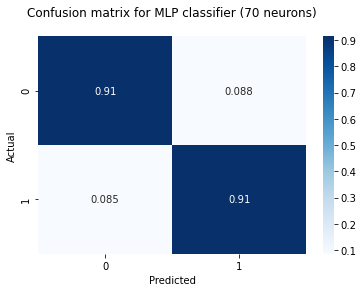

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(70,), random_state=1, max_iter=1000).fit(train_data, train_targets)
predicted_test_labels = clf.predict(test_data)

cm = confusion_matrix(test_targets, predicted_test_labels, normalize="true")
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title(f"Confusion matrix for MLP classifier (70 neurons)", pad=20)
plt.ylabel(f"Actual")
plt.xlabel(f"Predicted")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

9% de faux c'est pas super mais ça paaaasse